In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkarsabnis/yelp-reviews-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 3.49M/3.49M [00:01<00:00, 1.95MB/s]

Extracting files...


Path to dataset files: C:\Users\ZhuanZ\.cache\kagglehub\datasets\omkarsabnis\yelp-reviews-dataset\versions\1


In [4]:
import pandas as pd
import os

# 自动找到数据集文件
csv_path = os.path.join(path, "yelp.csv")
df = pd.read_csv(csv_path)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [9]:
print(df['text'].head(3).tolist())

['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!', 'I have no idea why some people give bad reviews about this place. It goes to show you, you can 

In [6]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', str(text))  # 去除HTML标签
    text = re.sub(r'[^a-zA-Z0-9.,!?\s]', '', text)  # 去除特殊字符
    text = re.sub(r'http\S+|www\S+', '', text)  # 去除网址（新增：Yelp评论可能有网址）
    text = text.lower().strip()  # 转小写、去空格
    return text

df["cleaned_text"] = df["text"].apply(clean_text)
print("清洗完成！")
df.head()

清洗完成！


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,cleaned_text
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,my wife took me here on my birthday for breakf...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,i have no idea why some people give bad review...
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,love the gyro plate. rice is so good and i als...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"rosie, dakota, and i love chaparral dog park!!..."
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello is a good egg!!!...


In [7]:
# 去掉重复和空行
df = df.drop_duplicates(subset="cleaned_text").dropna(subset=["cleaned_text"])

# 保存到 data 文件夹
output_path = "../data/yelp_cleaned.csv"
os.makedirs("../data", exist_ok=True)
df.to_csv(output_path, index=False)
print(f"已保存清洗结果到: {output_path}")
print("最终样本数量:", len(df))

已保存清洗结果到: ../data/yelp_cleaned.csv
最终样本数量: 9998


In [10]:
# 打印前3条清洗后的文本
print(df['cleaned_text'].head(3).tolist())

['my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semibusy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.\n\ndo yourself a favor and get their bloody mary.  it was phenomenal and simply the best ive ever had.  im pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.\n\nwhile everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best toast ive ever had.\n\nanyway, i cant wait to go back!', 'i have no idea why some people give bad reviews about this place. it goes to show you, you can please ever

星级分布：
stars
1     749
2     926
3    1461
4    3526
5    3336
Name: count, dtype: int64


C:\Users\ZhuanZ\.conda\envs\llm_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ZhuanZ\.conda\envs\llm_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ZhuanZ\.conda\envs\llm_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ZhuanZ\.conda\envs\llm_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ZhuanZ\.conda\envs\llm_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26143 (\N{CJK U

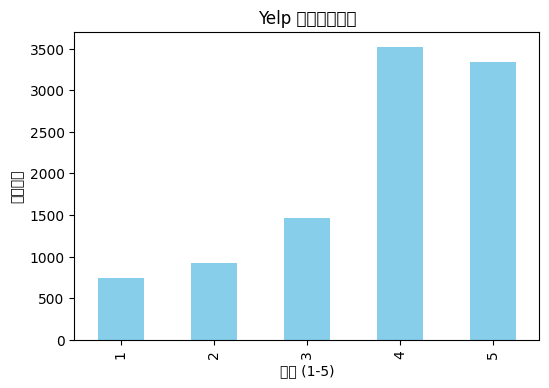

平均评论长度：703.21 个字符


C:\Users\ZhuanZ\.conda\envs\llm_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ZhuanZ\.conda\envs\llm_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


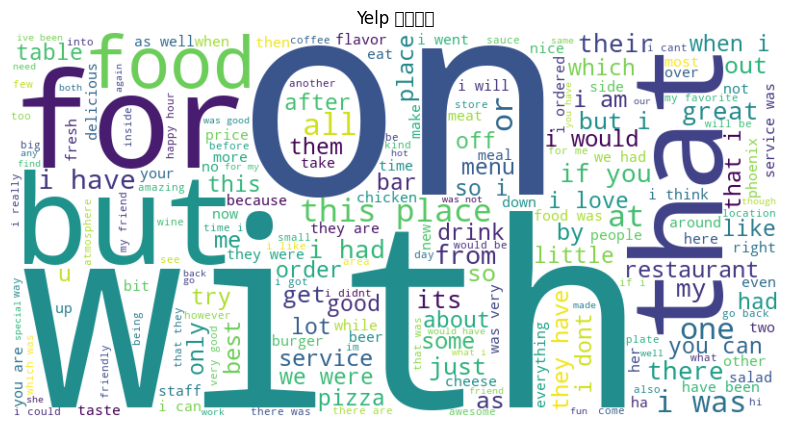

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 统计星级（正负面评论比例）
print("星级分布：")
print(df['stars'].value_counts().sort_index())

plt.figure(figsize=(6,4))
df['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Yelp 评论星级分布')
plt.xlabel('星级 (1-5)')
plt.ylabel('评论数量')
plt.show()

# 计算平均评论长度
avg_len = df['cleaned_text'].apply(len).mean()
print(f"平均评论长度：{avg_len:.2f} 个字符")

# 绘制词频分布的词云（WordCloud）
# 合并所有评论文本
all_text = " ".join(df['cleaned_text'].tolist())

# 生成词云
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    max_words=200,
    stopwords={"the", "and", "a", "of", "to", "is", "it", "in"}  # 常见停用词
).generate(all_text)

# 显示词云
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Yelp 评论词云")
plt.show()


In [15]:
# 查看最长和最短的评论
print("最长评论：", df.loc[df['cleaned_text'].apply(len).idxmax(), 'cleaned_text'])
print("最短评论：", df.loc[df['cleaned_text'].apply(len).idxmin(), 'cleaned_text'])


最长评论： in our continuing quest to identify cool, locally owned places to eat andor drink, caroline and i auditioned vintage 95 last night. 

before i go further, understand that whenever i go out for eats or drinks, i have  in  mind a platonic ideal of the barpubeatery i most want to frequent. im on a constant quest to find that  ideal expressed in real life. 

vintage 95 isnt quite there, but its damn close. if i ever give something five stars, youll know it has pegged my platonic ideal. anyway...

the plan last night was for drinks. no plans for food, just adult beverages and warm conversation. but it turned into more.

the location in downtown chandler is terrific for us. the owners have created a very fine visual experience  leather, stone, dark woods, good lighting. and they dont have the music turned up so loud that you cannot have a conversation. this is one of my pet peeves. if i want to stare at people move their mouths while enduring an aural assault, ill stand on the deck of 